Final Project

Tyler Gardner

November 18th 2021

# Task 1

## Code Chunk 1 - Libraries and Importing the Dataset

In the following code block I use the import command to import the necessary packages needed for the Colab Notebook. The import command brings the specific functionaility or library to the python script/code in the notebook. The 'as' creates an alias for the library that is being imported. For example. 'as' tells python that you're going to call the pandas library and functions as 'pd' from now on throughout the notebook.

A library in the terms of python/programming is a collection of files that contain functions for use by other programs. These libraries help eliminate writing code from scratch by using the functions/tools that are built within the libraries. We need to import these libraries into our notebooks so that when we want to use the tool or function it provides our code knows what we are referencing.

**Pandas**

pandas is a python package that helps make working with relational or labeled data easier. Pandas help with reading and writing data, data alignment, missing data, reshaping, grouping, merging and joining. pandas aim is to be the high-level building block for working with practical, real world data analysis.

I need the pandas library for many things throughout this notebook. First off I need it to import the data from my google drive using the pd.read_csv() function. I also need it in task 5 to use the pd.crosstab function for target exploration by predictors within the dataset. I also need to use it to Data encode my dataframe and target variable using the pd.get_dummies() function.

**Numpy**

Numpy's library/package is used for mathematical and logical operations on arrays. It also helps with fourier transforms and toutines for shape manipulation. Many of the numpy operations are related to linear algebra. Numpy has built in functions for linear algebra and random number generation.

I need the Numpy library/package to be able to do my column by column exploration in task 3 to find values in columns such as the mean, meadian, min, and max. It also is used in task 3 to do algebraic calculations such as finding the range using the min and max values of a column as well as the percentiles of column data.

**sklearn**

sklearn is a machine learning module for python that integrates classical machine learning algorithms for popular python packages such as numpy and matplotlib. This package/library contains many tools for machine learning and statistical modeling in classification models, regression models, and clustering and dimensionaility reduction. From sklearn you can import some of the many tools/functionalities it offers.

I need the sklearn package/library so I can use cross validation, split my model into training and test sets, get performance metrics and build models such as decision trees. I use the following functions/tools from sklearn within my notebook 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


tree is used to create and build a decision tree model to evaluate the dataframe.

metrics is used to output performance metrics of the dataframe such as precision, recall, f1-score, and support metrics.

cross_validate is used to cross validate the models built with the encoded dataframe/target variable to get the resulting performance metrics.

SVC is used to build the SVM model

MLPClassifier is used to build the MLP model in task 7

KNeighborsClassifier, KNeighborsRegressor is used to build the KNN model in task 7

**matplotlib**

matplotlib is a cross-platform, data visualization and grphical plotting library. Numpy is a numerical extension to it. This library/package is used to create and output plots. Throughout the colab notebook there will be many bar plots, box plots, and other plots and this package is what is used to create those. matplotlib helps with the visualization with Python.

I need the matplotlib library to be able to show the column by column exploration in task 3 using bar plots and box plots. I also need it for task 4 to create a bar plot while exploring the target variable.  


In [1]:
# Import Packages/Libraries Needed
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In the following code block I mount my google drive using the colab-specific google drive integration to be able to access the data from my google drive as well as save the google colab notebook in my google drive.

In [2]:
# mount the google drive location to read the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The code block below uses the pd.read_csv() to import the csv data file from my google drive into the colab notebook. The pd.read_csv() is part of the pandas library and is used to read a comma-separated values (csv) file into a DataFrame. The second line of code uses the copy() function to create a copy of the raw dataset so that if we need to reference our original untouched dataset throughout the notebook we can. This is very helpful to be able to import data from a common file type such as csv to be able to run through the notebook with the different libraries, packages, and functions to evaluate the data. 

In [3]:
# Import data using pd.read_csv()
Census_raw = pd.read_csv("/content/drive/MyDrive/data_sets/census.csv")
Census = Census_raw.copy()

# Task 2

## Code Chunk 2 - High-Level exploration of the dataset

In the following code block the pandas df.shape function is used. The shape property is used to get the current shape of an array. The shape function gives us the number of rows and columns in our dataframe as (rows, columns).

I chose to run this command because it is important to explore how big your dataframe is and it helps lay the landscape of what you are working with and what changes throughout the notebook. 

From this code we see that there are 32,561 rows of data with 15 columns.

In [4]:
# Count the number of rows and columns in your dataframe using df.shape
Census.shape

(32561, 15)

The following two code blocks use the shape function to print the number of columns and rows in a more readable and user friendly way. Essentially is taking the above code block and just creating a variable out of the (0,1) output and making it a sentence. This is more for the readability and clarification of the end user looking through the notebook.

In [ ]:
# Print the number of rows from Shape command
x = Census.shape[0]
print("Number of rows in Census Dataframe is", x)

Number of rows in Census Dataframe is 32561


In [ ]:
# Print the number of Columns from Shape command
x = Census.shape[1]
print("Number of columns in Census Dataframe is", x)

Number of columns in Census Dataframe is 15


The following code block is used to check for any missing values in the dataset using the isnull().sum() function from the pandas library. This returns the nuymber of missing values in the dataset.

From the code below we see that all our columns come back with zero missing values in the dataset which is good. If there were any null values we would have to decide what to do with them, whether that be drop them or give them a variable in place of a missing variable so they would not have an effect on our results of evaluation.

In [5]:
# Check for nulls with df.isnull().sum()
Census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
y                 0
dtype: int64

In the following code block the df.info() is used to help look at the dataframe. The info command is helpful becuase it gives a good amount of information about the dataframe to help us prepare to create models with our data. Some of the important information this command gives us is the number of rows, the column name, non-null count and the data type. Understanding what types of data we have in our dataframe is crucial so we evaluate and use the correct metrics and models to get the best results from our evaluation. 

In [6]:
# Show the overall structure and summary of the data frame using info(), describe(), head()
Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the df.info() command we see that there are 15 columns and we have a good mix of continious and categorical variables. The continuous columns are age, fnlwgt, education_num, capital_gain, capital_loss, and hours_per_week. The categorical columns are workclass, education, marital_status, occupation, relationship, race, sex, native_country, and our target variable y. There are not any null values which is good. All of the columns types appear to be labeled correctly but we will want to change the datatype 'object' to 'category' to help with our modeling.

In the following code block the df.astype() command is used to convert categorical features to categorical data types. The df.astype() command is very useful for correcting any datatypes that are not correct. The categorical columns are currently listed as object datatype. For evaluation it is important to have the right datatypes associated to each column which is why this is important. All of them will be changed except the target variable. Since the target variable is two subcategories of <=50K and >50K we will change it to binary where 0 = <=50K and 1 = >50K. This helps with modeling and performance metrics.

In [7]:
# Convert categorical features to categorical data types. Check the conversion with dtypes command
Census = Census.astype({'workclass':'category',
                        'education':'category',
                        'marital_status':'category',
                        'occupation':'category',
                        'relationship':'category',
                        'race':'category',
                        'sex':'category',
                        'native_country':'category'})
Census.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
y                   object
dtype: object

From the output of this code we use the df.dtypes to see the columns and their datatypes. We can see that all of the categorical columns data type changed to category except for the target variable. All of the continuous data types stayed as int64. 

In the following two code blocks the target variable y is changed to a binary scheme using the apply() function and lambda. This function is used to replace the two values in the column y and throughout the rows in the dataset. <=50K will be replaced with a '0'. >50K will be replaced with 1. The reason I chose to do this right now and not later is because the other columns have already been changed so now would be a good time to take care of ALL the columns so that one, such as the target variable is not forgotten as we progress through the evaluation.

In [ ]:
# Change 'y' to binary scheme of 1 and 0 ('<=50K => 0, ''>50K' => 1)
Census['y'] =Census['y'].apply(lambda x: x.replace('<=50K', '0'))
Census['y'] =Census['y'].apply(lambda x: x.replace('>50K', '1'))

In the following code, now that the target variable is set to a binary scheme of 0 and 1 we change the datatype from object to integer because it is an integer scheme now. By doing this it helps with results and reporting as we pursue the evaluation of the data and our conclusion. Many classifiers do not like having actual labels but prefer to have 0 and 1.

In [ ]:
# Change y datatype from object to integer
Census['y'] = Census['y'].astype('int')

In the following code block the df.head() command is used. This is a helpful function to help you see a preview of the dataset and some of the values in each column. By default it shows you the first 5 rows and all the columns in the dataframe. This is helpful to be able to see if you have any values that need to be corrected and is a helpful function to look at your dataframe as you make changes such as changing the target variable to a binary scheme as done in the previous two code blocks. 

In [ ]:
Census.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


Looking at the results from the df.head() command I wanted to look at more of the data so I changed it from it's defualt value of showing the first 5 rows to 15. I'm glad I did because you can see that we have an interesting value in the last row of native_country, its a '?'. I'm going to leave this because it isn't a null value and will be its own value during evaluation. Other than that it looks like what we expected and will be interesting to see the results and factors in our evaluation.

In this code block the df.describe() command is used. This is a helpful command to see the lots of different statistics and numbers of each column. These stats and information include the count, unique values, top values, frequency, mean, standard deviation, min and max. This helps you get a scope of what each column contains and some of the key values in each column to look out for or think about as you begin to explore more into the data and evaluate it with specific models.

In [ ]:
Census.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


I decided to add the 'include='all' in the describe command to get as much information as I could from the datafrom. Some of the key things that stand out to me from this output is the mean age of 38.58, the top education of HS-grad, top workclass is private, top marital_status is Married-civ-spouse, and top occupation is Prof-specialty. It also has the top relationship as husband, race white and sex male with top native_country as the United-States. It will be interesting to see what the results of our model will get and how closely it will line up with this information from the raw dataframe.

# Task 3

## Code Chunk 3 - Column by Column Exploration

Within the continuous columns section of task 3 we look at each column of the dataframe using a histogram, numpy metrics such as the mean, median, min, max and range, and the describe() command again to get a look at the percentiles within specific continious columns.

### Continuous Columns

In the following code block a histogram is used to explore the 'age' column of the dataframe. On the x axis is the different ages throughout the dataframe. On the y axis is the frequency or count of the different ages within the dataframe. A histogram is useful to see the distribution and pattern of the continous columns and their values. 

[]

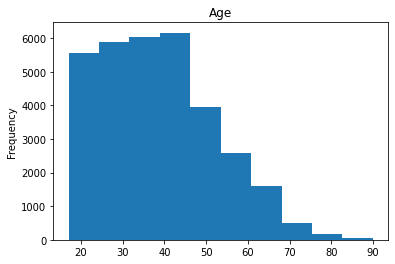

In [ ]:
# Column by Column exploration
#age
Census.age.plot.hist(title="Age")
plt.plot()

From the output of the age histogram we can see that our data falls between the 17 and 90 year old age range. A common age seems to be within 35-45 based on the shape and results of the histogram.

In the following code block the numpy package/library is used to extract the mean, meadian, min and max of the age column. This is helpful to see the statistics based on each column as well as to see patterns or expectations of results as we evaluate and create models on the dataframe.

In [ ]:
mean_age = (np.mean(Census.age))
median_age = (np.median(Census.age))
min_age = (np.min(Census.age))
max_age = (np.max(Census.age))
print("Mean Age: "+str(mean_age))
print("Median Age: "+str(median_age))
print("Min Age: "+str(min_age))
print("Max Age: "+str(max_age))

Mean Age: 38.58164675532078
Median Age: 37.0
Min Age: 17
Max Age: 90


From the output of these commands we see that the mean age is 38, median age is 37 and the min age is 17 and the max age is 90. This tells us that the people we are looking at are anywhere from young adults to pretty old with the average of them being around 37-39 years old.

The following code block takes the np.max and subtract it from the np.min to calculate the range of age difference. This is helpful to see the spread between the min and the max values in columns to help understand the perspective and outliers that may occur depending on the spread.

In [ ]:
range_age = np.max(Census.age)-np.min(Census.age)
print("Range of age difference: "+str(range_age))

Range of age difference: 73


From the output of this command we see that the range of age difference is 73 years. That is a good amount of range that we are dealing with. Some with lots of work experience and some just starting their carreers. 

[]

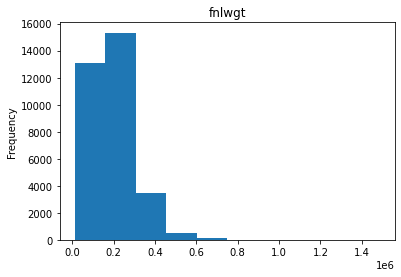

In [ ]:
# fnlwgt
Census.fnlwgt.plot.hist(title="fnlwgt")
plt.plot()

From this histogram output of the fnlwgt(final weight) column we see that majority of the values in this column fall between 0.2 and 0.3. The values in this column are in the thousands so really that would be 180,000 to 200,000. If you look in the bottom right of the histogram output you can see an 1e6 which is the values of the 0.2-0.3. For the most part of these results by looking at the histogram these look like they are somewhat close in value but still have a big spread.

In [ ]:
mean_fnlwgt = (np.mean(Census.fnlwgt))
median_fnlwgt = (np.median(Census.fnlwgt))
min_fnlwgt = (np.min(Census.fnlwgt))
max_fnlwgt = (np.max(Census.fnlwgt))
print("Mean Final Weight (fnlwgt): "+str(mean_fnlwgt))
print("Median Final Weight (fnlwgt): "+str(median_fnlwgt))
print("Min Final Weight (fnlwgt): "+str(min_fnlwgt))
print("Max Final Weight (fnlwgt): "+str(max_fnlwgt))

Mean Final Weight (fnlwgt): 189778.36651208502
Median Final Weight (fnlwgt): 178356.0
Min Final Weight (fnlwgt): 12285
Max Final Weight (fnlwgt): 1484705


The mean final weight is almost 190,000 and the median final weight is almost 180,000. We have a min final weight of 12,285 and a max final weight of 1,484,705. 

In [ ]:
range_fnlwgt = np.max(Census.fnlwgt)-np.min(Census.fnlwgt)
print("Range of Final Weight Difference: "+str(range_fnlwgt))

Range of Final Weight Difference: 1472420


From the output of this command we see that there is quite a big spread in final weights with a range difference of 1,472,420. 

[]

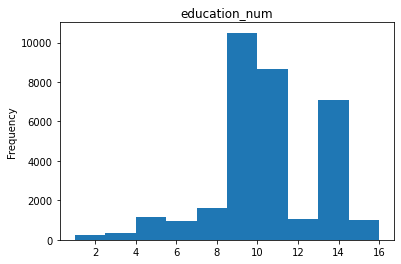

In [ ]:
# education-num
Census.education_num.plot.hist(title="education_num")
plt.plot()

From the output of this histogram of the education_num we see that the majority of the dataframe are at a 9 which is equivalent to a HS-Grad. I was surprised to see how much of our data did not get to a 9 and was also shocked at how many 14's are in the data which is equivalent to a masters degree. The top 3 common education_num are 9,10 and 13, 14. That seems to be accurate and typical given that a 9 is a HS-grad and 10 is some college and then 13 and 14 are bachelors and masters degrees.

In [ ]:
mean_education_num = (np.mean(Census.education_num))
median_education_num = (np.median(Census.education_num))
min_education_num = (np.min(Census.education_num))
max_education_num = (np.max(Census.education_num))
print("Mean education_num: "+str(mean_education_num))
print("Median education_num: "+str(median_education_num))
print("Min education_num: "+str(min_education_num))
print("Max education_num: "+str(max_education_num))

Mean education_num: 10.0806793403151
Median education_num: 10.0
Min education_num: 1
Max education_num: 16


From this output of code I was surprised to see that the actual average was closer to 10 not 9. 10 is some college rather than just a HS grad. 

In [ ]:
range_education_num = np.max(Census.education_num)-np.min(Census.education_num)
print("Range of education_num Difference: "+str(range_education_num))

Range of education_num Difference: 15


From the max and the min it looks like our range of education_num difference is 15. There seems to be a good spread throughout the range but definitely some high points as stated earlier.

[]

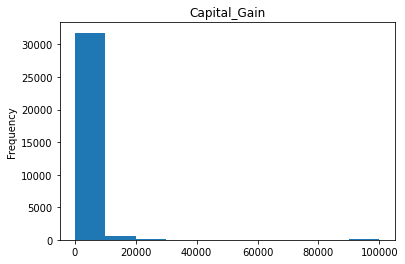

In [ ]:
# capital_gain
Census.capital_gain.plot.hist(title="Capital_Gain")
plt.plot()

From the output of the capital gain histogram is appears that the highest frequency of values in this column are from 0-100,000. Not very many values in this column exceed 200,000.

In [ ]:
mean_capital_gain = (np.mean(Census.capital_gain))
median_capital_gain = (np.median(Census.capital_gain))
min_capital_gain = (np.min(Census.capital_gain))
max_capital_gain = (np.max(Census.capital_gain))
print("Mean capital_gain: "+str(mean_capital_gain))
print("Median capital_gain: "+str(median_capital_gain))
print("Min capital_gain: "+str(min_capital_gain))
print("Max capital_gain: "+str(max_capital_gain))

Mean capital_gain: 1077.6488437087312
Median capital_gain: 0.0
Min capital_gain: 0
Max capital_gain: 99999


The mean capital gain was a lot lower than I expected. I expected it, based off the histogram to be closer to 50,000, not 1,077.65. It looks like the spread between min and max is going to be large.

In [ ]:
range_capital_gain = np.max(Census.capital_gain)-np.min(Census.capital_gain)
print("Range of Capital Gain Difference: "+str(range_capital_gain))

Range of Capital Gain Difference: 99999


As stated above the range of capital gain difference was expected to be large. Looks like nothing is over 1,000,000 but we do have values that are 0.

[]

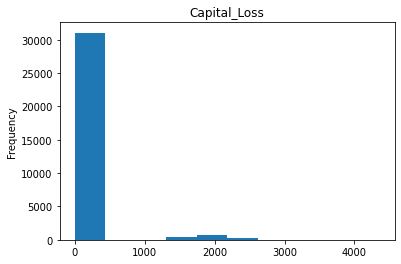

In [ ]:
# capital_loss
Census.capital_loss.plot.hist(title="Capital_Loss")
plt.plot()

It looks like the majority of our data does not have too great of capital_loss. There are still some high frequency's/counts around the 2000 mark however. 

In [ ]:
mean_capital_loss = (np.mean(Census.capital_loss))
median_capital_loss = (np.median(Census.capital_loss))
min_capital_loss = (np.min(Census.capital_loss))
max_capital_loss = (np.max(Census.capital_loss))
print("Mean capital_loss: "+str(mean_capital_loss))
print("Median capital_loss: "+str(median_capital_loss))
print("Min capital_loss: "+str(min_capital_loss))
print("Max capital_loss: "+str(max_capital_loss))

Mean capital_loss: 87.303829734959
Median capital_loss: 0.0
Min capital_loss: 0
Max capital_loss: 4356


The average capital_loss is 87.30. That is good especially considering that earlier the top native-country was the United-States which seems like if thats the case the capital-loss should be higher considering how much debt is with the US. Looks like the capital loss min and max's are spread out similarly to the capital_gains.

In [ ]:
range_capital_loss = np.max(Census.capital_loss)-np.min(Census.capital_loss)
print("Range of Capital Loss Difference: "+str(range_capital_loss))

Range of Capital Loss Difference: 4356


Given the min and the max above being 0 this was expected. This appears to be a big range of difference though given that the average capital_loss is 87.3.

[]

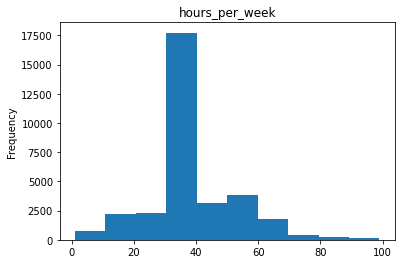

In [ ]:
# hours_per_week
Census.hours_per_week.plot.hist(title="hours_per_week")
plt.plot()

I found this histogram quite interesting given the amount of hours_per_week one works within the dataframe. It appears that the majority are right around 40 hours per week. There are some that are clear up to almost 100 and some that are almost not working any hours. If the ones that are working nearly 100 hours are not getting paid 50K or more they might want to find a different job. Those that are working less than 20 hours making more than 50K got a good job for sure. It will be interesting to see the evaluation metrics and relationship between this column and the target variable.

In [ ]:
mean_hours_per_week = (np.mean(Census.hours_per_week))
median_hours_per_week = (np.median(Census.hours_per_week))
min_hours_per_week = (np.min(Census.hours_per_week))
max_hours_per_week = (np.max(Census.hours_per_week))
print("Mean hours_per_week: "+str(mean_hours_per_week))
print("Median hours_per_week: "+str(median_hours_per_week))
print("Min hours_per_week: "+str(min_hours_per_week))
print("Max hours_per_week: "+str(max_hours_per_week))

Mean hours_per_week: 40.437455852092995
Median hours_per_week: 40.0
Min hours_per_week: 1
Max hours_per_week: 99


The average value of the hours_per_week are 40 hours which is expected considering that is what is considered full time. I was shocked by the min and the max and am curious how their salary reflects with how little or much time they put into working each week.

In [ ]:
range_hours_per_week = np.max(Census.hours_per_week)-np.min(Census.hours_per_week)
print("Range of Hours Per Week Difference: "+str(range_hours_per_week))

Range of Hours Per Week Difference: 98


Bigger spread than I expected for hours_per_week. I would have expected closer to 20 to 60 with a range difference of 40. 

### Categorical Columns

For categorical columns exploration we use a bar plot to show the value counts of each category within a column. Bar plots are very useful for categorical data becuase it shows you the common theme or categories within a column. Bar plots are a great way to visually represent categorical data. This type of graph emphasizes the relative sizes of each of the categories being measured by using either vertical or horizontal bars. Each trait within a column represents and corresponds to a different bar.

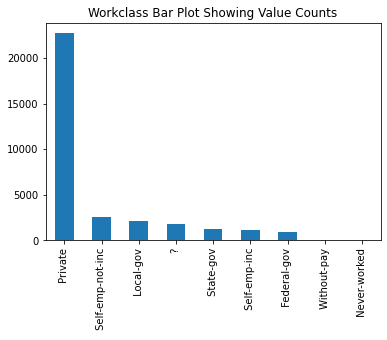

In [ ]:
# workclass
Census.workclass.value_counts().plot(kind='bar', title="Workclass Bar Plot Showing Value Counts")

From the bar plot output of workclass it appears that most of our data in this column fall under private. Another interesting bar in this graph is the '?'. It looks like there is a decent amount of data that falls into that category as well.

The following code block uses the value_counts() to give us a number of each category within a column as we explore the categorical columns. This is useful and goes hand in hand with the bar plot above becuase this gives you an exact number if there were bars that were too close to tell who had more or less. 

In [ ]:
Census.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

From the output of this value_counts() we see that Private is the majority and the rest of them are fairly close together except federal-gov, without-pay and never-worked, they seem to be lacking numbers and are more outliers compared to the other categorys in the workclass column.

The following command is essentially the command above with value_counts() being the main function. What changes here is that we add the parameter of 'normalize=True'. This puts the categorys in the columns in proportions as percentages. Just another way of seeing the data if the numbers are not clear or give enough information. The 'round' before the value_counts() rounds our outputs and the ndidgits=2 makes it so the proportions only have two numbers after the decimal.

In [ ]:
round(Census.value_counts('workclass',normalize=True), ndigits=2)

workclass
 Private             0.70
 Self-emp-not-inc    0.08
 Local-gov           0.06
 ?                   0.06
 State-gov           0.04
 Self-emp-inc        0.03
 Federal-gov         0.03
 Without-pay         0.00
 Never-worked        0.00
dtype: float64

From this output we see that 70% of this columns data is Private for workclass. That is a big chunk of the data.

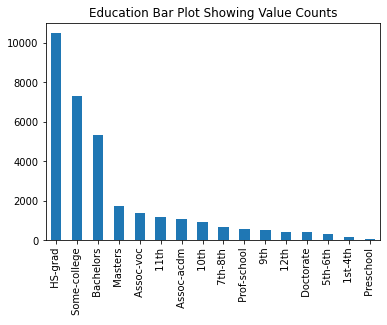

In [ ]:
# education
Census.education.value_counts().plot(kind='bar', title="Education Bar Plot Showing Value Counts")

From the education barplot output the majority of our data appears to at least be a HS-grad and many have some-college or a bachelors degree. Given the information we know from the continious columns this was expected. Especially with an age group of 17 to 90 years old you would expect most of them to be at least HS-Grad's.

In [ ]:
Census.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

This output puts some actual numbers to the education bar plot above. Looks like HS-grad has lots of value counts compared to the others. Some-College and bachelors are close together. Masters, Assoc-voc,11th and Assoc-acdm are close as well. Given that our dataframe age range is 17-90 years old I am actually surprised that 51 people in our dataset only have a Preschool education.

In [ ]:
round(Census.value_counts('education',normalize=True), ndigits=2)

education
 HS-grad         0.32
 Some-college    0.22
 Bachelors       0.16
 Masters         0.05
 Assoc-voc       0.04
 11th            0.04
 Assoc-acdm      0.03
 10th            0.03
 7th-8th         0.02
 Prof-school     0.02
 9th             0.02
 12th            0.01
 Doctorate       0.01
 5th-6th         0.01
 1st-4th         0.01
 Preschool       0.00
dtype: float64

This output shows the percentages of each category within the column and it backups the conclusions we have already made that most of this data falls under HS-grad, some-college, and bachelors.

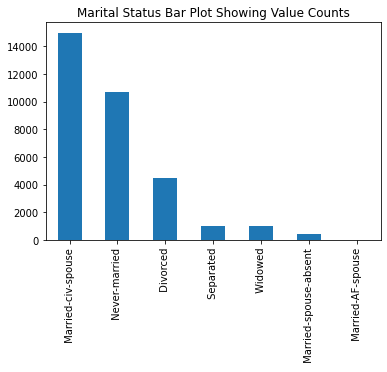

In [ ]:
# marital-status
Census.marital_status.value_counts().plot(kind='bar', title="Marital Status Bar Plot Showing Value Counts")

From the output of the marital-status bar plot it appears that the majority of our data falls under 3 categories. The most value counts for this column fall under the Married-civ-spouse category. The next category for this column that has a lot of value counts is never-married and then divorced would be the 3rd most value with a high count. 

In [ ]:
Census.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

Seeing the column categories in number form with this output shows that never-married and married-civ-spouse are fairly close. It also shows that divorced has a good amount of value counts.

In [ ]:
round(Census.value_counts('marital_status',normalize=True), ndigits=2)

marital_status
 Married-civ-spouse       0.46
 Never-married            0.33
 Divorced                 0.14
 Separated                0.03
 Widowed                  0.03
 Married-spouse-absent    0.01
 Married-AF-spouse        0.00
dtype: float64

Almost half of our data in this column fall under the category of Married-civ-spouse. Basically a third of the data in this column fall under the category of Never-married. Overall the three main category's within the marital-status column are married-civ-spouse, never-married, and divorced. These three columns make up approximately 93% of the data (0.46+0.33+0.14=0.93).

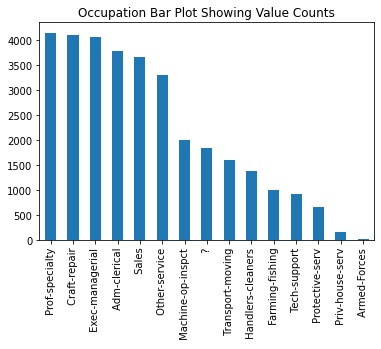

In [ ]:
# occupation
Census.occupation.value_counts().plot(kind='bar', title="Occupation Bar Plot Showing Value Counts")

The output from this bar plot showing the value counts of occupations within the occupation column seems to have the most variety so far but still has some common trends with certain categories of occupation within this column of the dataset. Looks like the top bar in the bar plot is Prof-speciality with craft-repair and Exec-managerial being pretty close to the same size as well. Prof-speciality and Exec-managerial seem very similar it is interesting that craft-repair is up there with them. 

In [ ]:
Census.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

From the actual number outputs of each category in the occupation column it back ups the observations we have made previously with the bar plot. It looks like the first 6 categories in this column of data are all fairly close between 3000 and 4000 value counts. 

In [ ]:
round(Census.value_counts('occupation',normalize=True), ndigits=2)

occupation
 Prof-specialty       0.13
 Craft-repair         0.13
 Exec-managerial      0.12
 Adm-clerical         0.12
 Sales                0.11
 Other-service        0.10
 Machine-op-inspct    0.06
 ?                    0.06
 Transport-moving     0.05
 Handlers-cleaners    0.04
 Farming-fishing      0.03
 Tech-support         0.03
 Protective-serv      0.02
 Priv-house-serv      0.00
 Armed-Forces         0.00
dtype: float64

Looking at it in a proportions view as percentages of the data within the occupation column for the most part it is fairly spread out but still those top 6 categories in the list are 70% of this columns data.

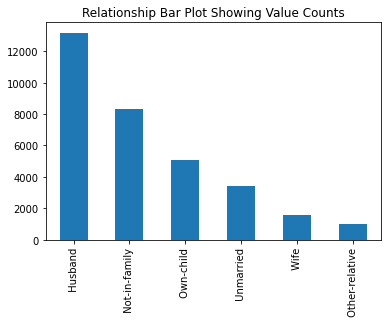

In [ ]:
# relationship
Census.relationship.value_counts().plot(kind='bar', title="Relationship Bar Plot Showing Value Counts")

From the output of this barplot, husband is definitely the dominate realtionship category within the relationship column. In respect to that 'wife' is one of the smaller value count's within this columns data. Common trend there that most likely the husband works and the wife stays home with the kids. 

In [ ]:
Census.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

From the value counts shown as actual counts with numbers it backs up our observations made above in the bar plot. Husband is the dominate category within this column of data. I found that the not-in-family category in this column is interesting given that there is also an unmarried category within the relationship column.

In [ ]:
round(Census.value_counts('relationship',normalize=True), ndigits=2)

relationship
 Husband           0.41
 Not-in-family     0.26
 Own-child         0.16
 Unmarried         0.11
 Wife              0.05
 Other-relative    0.03
dtype: float64

Looking at this columns data as proportions we see that husband is just 0.09 off from being 50% of this columns data. Not-in-family is also a big chunk of the data being just over 1/4 of the data in this column.

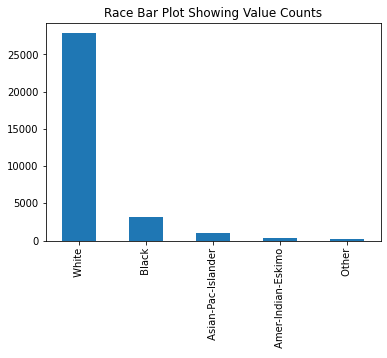

In [ ]:
# race
Census.race.value_counts().plot(kind='bar', title="Race Bar Plot Showing Value Counts")

From this bar plot it appears that majority of the data we collected comes from those with the race of being white. The white bar in the bar plot is huge compared to the other races within the categories of the race column. 

In [ ]:
Census.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

Looking at the values as integers from this code we see that all of the other categories excuding the white race does not even add up to close the value count of the white race data. All the other categories combined only equal 4,745. This will be something to consider when evaluating and creating models. Most likely the data we gather in regard to race will be white.

In [ ]:
round(Census.value_counts('race',normalize=True), ndigits=2)

race
 White                 0.85
 Black                 0.10
 Asian-Pac-Islander    0.03
 Amer-Indian-Eskimo    0.01
 Other                 0.01
dtype: float64

As proportions we see that the White race is 85% of the data within this column. Between the white race category and black race, that is 95% of the value's within the race column.

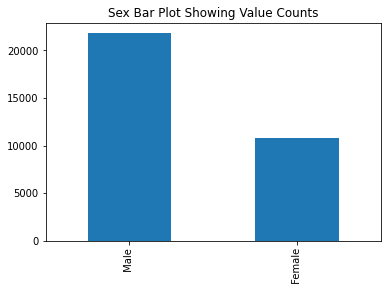

In [ ]:
# sex
Census.sex.value_counts().plot(kind='bar', title="Sex Bar Plot Showing Value Counts")

From the output of the sex column bar plot we see that there are almost double the amount of males within our dataframe as there are females. Given the findings we found from relationships with a lot of our data being 'husbands', this would be logical and make sense. 

In [ ]:
Census.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

Seeing the sex column categories as a number confirm the observations we have made with the bar plot. 

In [ ]:
round(Census.value_counts('sex',normalize=True), ndigits=2)

sex
 Male      0.67
 Female    0.33
dtype: float64

Over half of the values in the sex column fall under the category of male. Given that there are only two columns we also see as a proportion that there are double the amount of males in this data then females. 

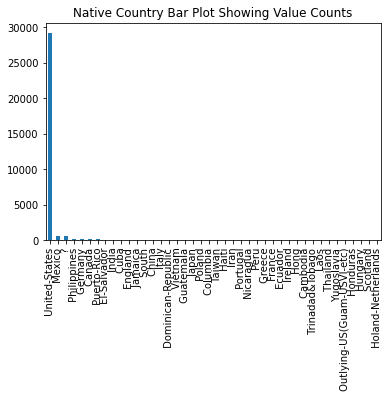

In [ ]:
# native_country
Census.native_country.value_counts().plot(kind='bar', title="Native Country Bar Plot Showing Value Counts")

The output of this bar plot is heavily favored towards the category of native-country being the United States. There are a lot of other categories within this column but still the united states values appear to be the majority of this columns values. 

In [ ]:
Census.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

From the output of the value counts as actual numbers to each category within the native-country column we see that the United States number is very large compared to the rest of the categories in this column. Primarily the data values in this column are either the United States or Mexico.

In [ ]:
round(Census.value_counts('native_country',normalize=True), ndigits=2)

native_country
 United-States                 0.90
 Mexico                        0.02
 ?                             0.02
 Philippines                   0.01
 Germany                       0.00
 Canada                        0.00
 Puerto-Rico                   0.00
 El-Salvador                   0.00
 India                         0.00
 Cuba                          0.00
 England                       0.00
 Jamaica                       0.00
 South                         0.00
 China                         0.00
 Italy                         0.00
 Dominican-Republic            0.00
 Vietnam                       0.00
 Guatemala                     0.00
 Japan                         0.00
 Poland                        0.00
 Columbia                      0.00
 Taiwan                        0.00
 Haiti                         0.00
 Iran                          0.00
 Portugal                      0.00
 Nicaragua                     0.00
 Peru                          0.00
 Greece      

Seeing the native_country column categories as a proportion show that the majority of the values in this column are the 'United States' (90%). Between the United States and Mexico that is 92% of the values within this column but there are still many other categories within this column, just not as frequent or high of counts as the US and Mexico. 

# Task 4

## Code Chunk 4 - Target Variable Exploration

Is the data mining task a classification or regression task?

This data mining task is a classification task. The prediction task is to detemine whether a person makes over 50K a year. Because we are trying to classify whether a perosn makes over 50K a year or not, we are tasked to classify things into those sub-categories. Classification is the task of classifying things into sub-categories. A regression task is more focused on learning the function or relationship from a given set of continuous data. Therefore this data mining task would be a classification task rather than a regression.

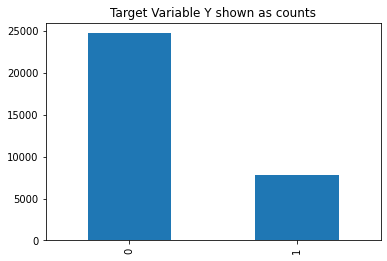

In [ ]:
Census.y.value_counts().plot(kind='bar' , title='Target Variable Y shown as counts')

The above bar plot shows the target variable as value counts. 0 represents those that make less than or equal to 50K a year and the 1 represents those that make 50K or more a year. We can see that those that make less than or equal to 50K a year are more than double the amount than those in our dataset that make over 50K a year. This will be important to know because our target variable is not balenced. We will expect that our results will be those that make less than 50K a year given this information.

In [ ]:
Census.y.value_counts()

0    24720
1     7841
Name: y, dtype: int64

The code above shows the target variable as actual numbers. The '0' or those that make less than or equal to 50K a year are over double those that make over 50K a year. 

In [ ]:
# 2. Is the target variable balanced or imbalanced?
round(Census.y.value_counts() / len(Census),2)

0    0.76
1    0.24
Name: y, dtype: float64

As shown in the code above, the target variable is imbalanced. 0 represents all those that make less than or equal to 50K a year and the 1 represents those that make more than 50K a year. It is imbalanced because balanced would be close to 50% making less than or equal to 50K a year and close to 50% making more than 50K a year. From the output of the above code we get 76% that make less than or equal to 50K a year and 24% that make more than 50K a year, thus meaning the target variable is quite imbalanced.

The reason that this is important to look at is because we can expect as we run our performance metrics and tests that since we have more observations and instances where a given person in the dataset makes less than or equal to 50K a year we will likely see more results from that category verse the data results favoring those that make over 50K a year because it is imbalanced. 

In the below code a similar function is run to the code above. This code uses value_counts as a percentage to help us see what the majority classifier is and what we have to  beat. The code shows us the target variable as a proportion.

In [ ]:
# What is the majority classifier's accuracy on the target variable? (What accuracy do we need to beat to do better than a majority classifier?)
Census.y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: y, dtype: float64

The code above is used to show the target variable as a proportion as well as to see the majority classifier's accuracy on the target variable. 

The majority classifier is '0' (less than or equal to 50K) at 76%. Given this information the majority classifier would suggest that all of the instances in the dataset will be less than or equal to 50K since it is a bigger proportion as shown above.

The accuracy we need to beat to do better than the majority classifier is 76% of the data making <=50K a year.

What classification performance metrics will you be using based on what you have learned about the target variable. Rank the metrics you will be using from most important to least important and explain your reasoning for the ranking. 

The classification performance metrics I will be using based on what I have learned about the target variable are Precision, recall, F1 and accuracy.

Ranked Metrics and explanation-

1- F1

The reason I rank F1 as the most important is because it is the weighted average of precision and recall. The F1 score takes both the false positives and flase negatives into account. It is not as easy to understand as accuracy is but is more often more useful than accuracy especially since we have a imbalanced target variable.

2- Precision

The reason I picked and ranked precision as the 2nd most important is because this metric answers, of all the people in our data that we labeled as making more than 50K a year, how many actually did? A high precision relates to a low false positive rate.

3-Recall

I put recall as the 3rd most important because it answers the question in our dataset of all of the people that truly made over 50K a year, how many did we label? Recall is the ratio of correctly predicted positive observations to the all observations in the actual class.

4- Accuaracy

The reason I rank accuracy as the least imnportant is because we do not have a symmetrical or balaneced target variable. This performance metric is good but only when we have a balanced target variable where values of false positives and false negatives are almost the same.

# Task 5

## Code Chunk 5 - Target Exploration by Predictors

### Categorical Predictors

In the following code blocks the pandas crosstab command is used as we look and explore categorical predictors with the target variable. The crosstab function computes a simple cross tabulation of two or more factors. In this case it computes one of the columns in the dataset and the target variable. By default, the crosstab command computes a frequency table of the factors unless an array of values and an aggregation function are passed. The reason I chose to do this is because it shows the relationship between the categories within a categorical column as a proportion when you add the 'normalize=True' parameter and you are able to see each categories relationship with the two categories within the target variable. 

In [ ]:
pd.crosstab(Census['y'], Census['workclass'],normalize=True)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
y,,,,,,,,,
0,0.050521,0.018089,0.045330,0.000215,0.544609,0.015172,0.055803,0.029022,0.00043
1,0.005866,0.011394,0.018949,0.000000,0.152422,0.019103,0.022235,0.010841,0.00000


From the output of the crosstab command based off the workclass predictor and the target variable we see how each of the different categories within the workclass associate with the target variable. You can tell that private is the majority values of the workclass column becuase of how associated it is with the target variable. It appears that overall the proportions of each category within the workclass column associate more and reflect more results with '0' or in other words they make less than or equal to 50K a year.

In [ ]:
pd.crosstab(Census['y'], Census['education'],normalize=True)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
y,,,,,,,,,,,,,,,,
0,0.026750,0.034243,0.012285,0.004975,0.009736,0.018611,0.014957,0.024631,0.031357,0.09625,0.003286,0.271060,0.023464,0.001566,0.004699,0.181321
1,0.001904,0.001843,0.001013,0.000184,0.000491,0.001228,0.000829,0.008139,0.011087,0.06821,0.009398,0.051442,0.029452,0.000000,0.012991,0.042597


From the crosstab command output in regard to education the only two categories within the education column that have a strong proportion for making more than 50K a year ('1') is HS-grad and Bachelors. It appears to be distributed fairly evenly for those that make less than or equal to 50K a year across all categories in the education column.

In [ ]:
pd.crosstab(Census['y'], Census['marital_status'],normalize=True)

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
y,,,,,,,
0,0.122232,0.000399,0.254415,0.011793,0.313012,0.029452,0.027886
1,0.014219,0.000307,0.205522,0.001044,0.015079,0.002027,0.002610


The output of this crosstab command seems pretty interesting. Particularly when you look at the Married-Civ-Spouse the proportion for 0 and 1 in the target variable are almost the same. Divorced and never-married have a strong proportion to making less than or equal to 50K a year.

In [ ]:
pd.crosstab(Census['y'], Census['occupation'],normalize=True)

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
y,,,,,,,,,,,,,,,
0,0.050736,0.100212,0.000246,0.097356,0.064433,0.026995,0.039434,0.053807,0.096987,0.004545,0.070053,0.013452,0.081908,0.019809,0.039219
1,0.005866,0.015571,0.000031,0.028531,0.060440,0.003532,0.002641,0.007678,0.004207,0.000031,0.057093,0.006480,0.030189,0.008691,0.009828


In this crosstab output there is a lot to look at. Adm-clerical has a 0.100 for making less than or equal to 50K a year. Many of the proportions are greater to less than or equal to 50K a year. Some of the associations with making more than 50K a year are decent but nothing stands out in particular at first glance.

In [ ]:
pd.crosstab(Census['y'], Census['relationship'],normalize=True)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
y,,,,,,
0,0.223427,0.228771,0.028992,0.153589,0.099137,0.025276
1,0.181751,0.026289,0.001136,0.002058,0.006695,0.022880


The crosstab command for the relationship column and its respective categories show that husband and not in family are heavily part of the dataset. The proportions favor making less than or equal to 50K a year. This all lines up with what we have already evaluated with our column by column exploration and target variable exploration.

In [ ]:
pd.crosstab(Census['y'], Census['race'],normalize=True)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
y,,,,,
0,0.008446,0.023433,0.084058,0.007555,0.635699
1,0.001106,0.008476,0.011885,0.000768,0.218574


The biggest proportions from this race column exploration by the target variable comes from the white race. Still in favor of making less than or equal to 50K a year.

In [ ]:
pd.crosstab(Census['y'], Census['sex'],normalize=True)

sex,Female,Male
y,,
0,0.294586,0.464605
1,0.036209,0.204601


The output of this crosstab shows that the proportions for both males and females favor making less than or equal to 50K a year and the realtionship is strong in regard to males.

In [ ]:
pd.crosstab(Census['y'], Census['native_country'],normalize=True)

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.013421,0.000369,0.002518,0.001689,0.001751,0.002150,0.002088,0.000737,0.002979,0.001843,0.000522,0.002856,0.000645,0.001873,0.001228,0.000031,0.000369,0.000430,0.000307,0.001843,0.000768,0.000584,0.001474,0.002181,0.001167,0.000491,0.018734,0.000983,0.00043,0.000891,0.004207,0.001474,0.001013,0.003133,0.000276,0.001966,0.000952,0.000461,0.000522,0.675624,0.001904,0.000307
1,0.004484,0.000215,0.001198,0.000614,0.000061,0.000768,0.000061,0.000123,0.000276,0.000921,0.000369,0.001351,0.000246,0.000092,0.000123,0.000000,0.000031,0.000184,0.000092,0.001228,0.000553,0.000154,0.000768,0.000307,0.000737,0.000061,0.001013,0.000061,0.00000,0.000061,0.001873,0.000369,0.000123,0.000369,0.000092,0.000491,0.000614,0.000092,0.000061,0.220233,0.000154,0.000184


The United states dominates this crosstab command and within the United States category of the Native country column, it still has a strong relationship with making less than or equal to 50K a year.

### Continuous Predictors

In the following code blocks to explore the target variable by continous predictors a boxplot will be used because our target variable is a categorical variable. A box plot is a good way to see the relationship of a continious variable and a categorical variable. Box plots are a measure of how well distributed the data in a data set is. It divides the selected data into three quartiles. The graph represents the min, max, median, first quartile, and third quartile of the data set. 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


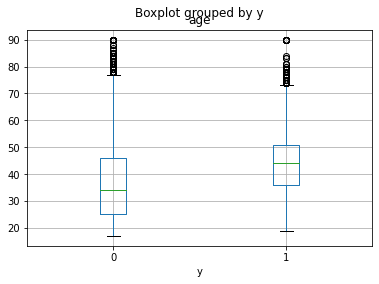

In [ ]:
Census.boxplot('age',by='y')
plt.show()

From the output of this boxplot we see that the older the age, the more likely they make more than 50K a year. We also see on the flip side that the younger the age, the more likely they make less than or equal to 50K a year.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


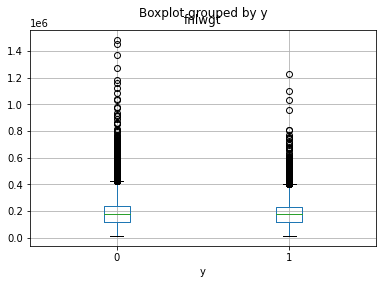

In [ ]:
Census.boxplot('fnlwgt',by='y')
plt.show()

This box plot doesn't appear to show a very good relationship in regard to the fnlwgt column and the target variable.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


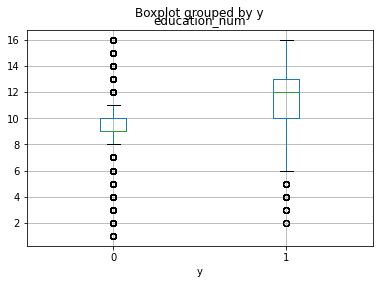

In [ ]:
Census.boxplot('education_num',by='y')
plt.show()

The boxplot in regard to the education_num predictor for the target variable appears to show that the higher the education, the more likely that they make more than 50K a year and the lower the education the more likely they make less than or equal to 50K a year. With that being said it also looks like 9-13 are the inner quartiles where most of the data values fall for the education_num column.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


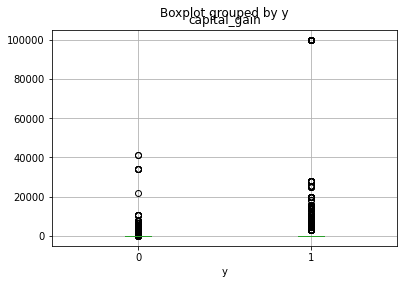

In [ ]:
Census.boxplot('capital_gain',by='y')
plt.show()

This box plot does not show a good relationship.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


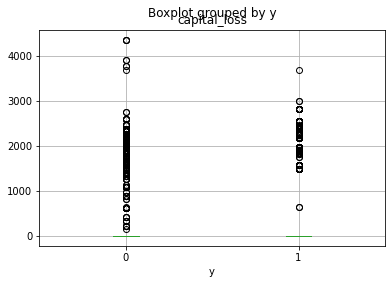

In [ ]:
Census.boxplot('capital_loss',by='y')
plt.show()

This box plot does not show a good relationship.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


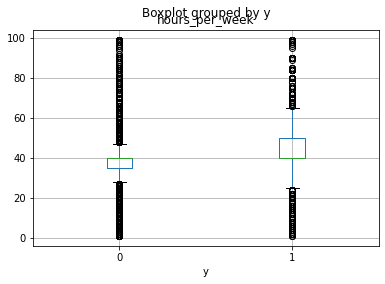

In [ ]:
Census.boxplot('hours_per_week',by='y')
plt.show()

This box plot shows that there is a relationship with how many hours per week you work. The more hours per week you work, the more likely you make more than 50K a year. The less hours you work the more likely you make less than or equal to 50K a year.

# Task 6

## Code Chunk 6 - Data Encoding

Within code chunk 6 the target variable is popped from the dataset into a new variable and one hot encoded. The rest of the dataframe is also one hot encoded in preparation to evaluate and create models for our dataframe.

The df.pop() command is used to remove a specified column from the dataframe, in this case it is the target variable so that while we build our models we can classify which columns of data associate and correlate with the outcome of the target variable. It is important to do this so that you are able to evaluate and build your models based off the columns within your data set to the target variable, otherwise you will not have anything to compare and evaluate with.

In [ ]:
# pop() the target variable into a new variable 

y_target = Census.pop('y')

pd.get_dummies or one hot encoding is used for data manipulation and converts categorical data into 'dummy' or indicator variables. It turns all of our categorical columns into 0's and 1's and breaks out the categorical columns into their own column. This function is very helpful for machine learning algorithms. The reason I chose to do this for the target variable is because it helps with data manipulation and building models and we will also do this with the rest of the dataframe in the following code blocks.

In [ ]:
# Encode the target variable
y_target = pd.get_dummies(y_target,drop_first=True)

The shape command is used here to show the dataframe shape before we one hot encode the dataframe to see what happens and/or changes when we do the pd.get_dummies command.

In [ ]:
Census.shape

(32561, 14)

The head command is printed out to also show the change in the columns and values within the columns as we use the pd.get_dummies command to one hot encode our dataframe.

In [ ]:
Census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
# Encode the dataset
Census_ENC = pd.get_dummies(Census)

In [ ]:
Census_ENC.shape

(32561, 108)

Describe the difference pre and post encoding of the dataframe. How has the shape changed?

Comparing the original un-encoded dataframe to the now encoded dataframe shape we see that it still has the same amount of rows, but we now have more columns. If we look below in the head() command we also see that all of our categorical variables were changed to 0's and 1's and the categories within the categorical columns were broken out into their own separate columns, hence why we have 108 columns verses 14 now that we one hot encoded our dataframe. 

In [ ]:
Census_ENC.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Task 7

## Code Chunk 7 - Model Building

### Decision Tree Model

In the following code block a decision tree model is built using the sklearn package/library. Decision trees are a good model to use when you are trying to evaluate a classification task. A decision tree is similar to a flow chart. Within the decision tree there are nodes and branches. The nodes represent certain features and outcomes while the branches represent rules based on decisions made from the data. The idea behind a decision tree algorithm is that it selects the best attribute using attribute selection measures to split the records. It then makes that attribute a decision node an dbreaks the dataset into smaller subsets and starts building a tree by repeating this process recursively for each child until one of the conditions match whether it be all the tuples belong to the same attribute value or there are no more remaining attributes or ther are no more instances. 

In the following code block the decision tree model is created using the DecisionTreeClassifier from the Sklearn library using the encoded dataframe and encoded target variable. The sklearn.utils.validation.check_is_fitted is used to verify if the model is fitted correctly. If it is fitted correctly it runs normal without errors, if not there is an output stating so. The reason I chose to do this is because it is best practice to verify your code runs correctly. The next line of code prints and shows the tree model and summary of the model using the print and export_tree command.

In [ ]:
# Train a tree model using the default setting. Plot the tree. 
# Generate and compare this model's confusion matrices and classification
# evaluation metrics in testing and training sets

tree_model = tree.DecisionTreeClassifier(class_weight='balanced')
tree_model

tree_model = tree_model.fit(Census_ENC,y_target)

# Check to see if the model is fitted.
sklearn.utils.validation.check_is_fitted(tree_model)
# note that you only get an output if the model is not fitted.


In the following code block the cross_validate from sklearn is used to evaluate the decision tree model with our original encoded dataframe. The cross_validate function is a statistical method used to estimate the skill of machine learning models based on performance metrics. This is useful because it gives you performance metrics and cross validates between the data by splitting it and training the data and giving you test scores to see how well it did based on the scoring parameters chosen.

In [ ]:
cross_validate(
    tree_model, Census_ENC, y_target, cv=5, scoring=['f1', 'recall', 'precision', 'accuracy'],return_train_score=True
)

{'fit_time': array([0.33769965, 0.32806849, 0.348387  , 0.31421256, 0.31188941]),
 'score_time': array([0.01292682, 0.01292992, 0.01301479, 0.01254582, 0.01284671]),
 'test_accuracy': array([0.81636727, 0.81464988, 0.81418919, 0.82140663, 0.82539926]),
 'test_f1': array([0.61789137, 0.61670372, 0.61925739, 0.62688483, 0.64121174]),
 'test_precision': array([0.6194747 , 0.61416825, 0.61118012, 0.6307295 , 0.63460337]),
 'test_recall': array([0.61631612, 0.6192602 , 0.62755102, 0.62308673, 0.64795918]),
 'train_accuracy': array([1.        , 0.99996161, 0.99996161, 1.        , 0.99996161]),
 'train_f1': array([1.       , 0.9999203, 0.9999203, 1.       , 0.9999203]),
 'train_precision': array([1.        , 0.99984061, 0.99984061, 1.        , 0.99984061]),
 'train_recall': array([1., 1., 1., 1., 1.])}

The output of the cross_validate is shown which means it ran successfully. We can see in each score there are 5 scores, that is because we chose to do 5 fold cross validation which is determined by the 'cv=5' to determine the cross validation splitting strategy. We will see a better looking and readable version of the scores as a table in the code chunk below.


The following code just takes the above code and gives it a name (DT_scores) so that it can be printed as a dataframe for better readability and display. The pd.dataframe command is used to output the Cross validate scores into a dataframe.

In [ ]:
DT_scores = cross_validate(
    tree_model, Census_ENC, y_target, cv=5, scoring=['f1', 'recall', 'precision', 'accuracy'],return_train_score=True
)
pd.DataFrame(DT_scores)

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,0.331911,0.013244,0.618851,1.00000,0.621415,1.0,0.616308,1.000000,0.815600,1.000000
1,0.334229,0.012587,0.617339,0.99992,0.619898,1.0,0.614801,0.999841,0.814957,0.999962
2,0.342180,0.013062,0.623320,0.99992,0.635842,1.0,0.611281,0.999841,0.814957,0.999962
3,0.330464,0.012929,0.626731,1.00000,0.620536,1.0,0.633051,1.000000,0.822021,1.000000
4,0.327341,0.012677,0.642363,0.99992,0.651786,1.0,0.633209,0.999841,0.825246,0.999962


In the next three code blocks we create a variable to evaluate and output the mean and standard deviation of the cross validation results. Out of all the scores in each column, the mean and standard deviation are computed and shown.

In [ ]:
DT_CV_Results = pd.DataFrame(DT_scores)

In [ ]:
DT_CV_Results.mean(axis=0)

fit_time           0.333225
score_time         0.012900
test_f1            0.625721
train_f1           0.999952
test_recall        0.629895
train_recall       1.000000
test_precision     0.621730
train_precision    0.999904
test_accuracy      0.818556
train_accuracy     0.999977
dtype: float64

In [ ]:
DT_CV_Results.std(axis=0)

fit_time           0.005594
score_time         0.000271
test_f1            0.010015
train_f1           0.000044
test_recall        0.013911
train_recall       0.000000
test_precision     0.010566
train_precision    0.000087
test_accuracy      0.004780
train_accuracy     0.000021
dtype: float64

From our cross validation between the decision tree and encoded dataframe/target variable our test F1 scores, test recall scores and test precision scores are right around 0.60-0.63, with an average of 0.62. Our test accuracy metric is around 0.81-0.82 but is not a good metric to base conclusions on given that our target variable is imbalanced. I did add in the decision tree modeling "class_weight = Balanced" to try and help with the imbalances in our target variable. If you look at our train scores we have a lot that are close to or are exactly 1. This is not a good thing, especially when looking at our train scores compared to our test scores. This model has some overfitting going on. I tried to correct the overfitting by adjusting some parameters but it made it worse so I left it with this model as it is. Some of the parameters that could help if the right adjustments are made would be the ccp_alpha and the class_weight as well as considering max_leaf_nodes and other min and max parameters for the model. The standard deviation and mean outputs of the cross validation back up the analysis made on the original results seen and observed of the cross validation between the decision tree and the encoded dataframe.

### SVM Model

In this SVM(Support vector machine) model the main idea is based on the labeled data that the algorithm tries to find the optimal hyperplane which can be used to classify new data points. We use the support vector classification. The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. With our dataset however it is practical.

In [ ]:
svc = SVC()

In [ ]:
SVC_scores =cross_validate(
    svc, Census_ENC, y_target, cv=5, scoring=['f1', 'recall', 'precision', 'accuracy'],return_train_score=True
)
pd.DataFrame(SVC_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,49.041541,9.125682,0.269737,0.261507,0.156788,0.150829,0.964706,0.982347,0.795486,0.794879
1,46.735350,9.074137,0.256779,0.264994,0.147959,0.153196,0.970711,0.980612,0.793765,0.795347
2,47.609096,9.171155,0.260100,0.260810,0.149872,0.150486,0.983264,0.977226,0.794687,0.794579
3,46.979261,9.295176,0.270627,0.263172,0.156888,0.152080,0.984000,0.976459,0.796376,0.794925
4,47.776646,9.245697,0.255556,0.261254,0.146684,0.150805,0.991379,0.976264,0.794226,0.794618


In [ ]:
SVC_Results = pd.DataFrame(SVC_scores)

In [ ]:
SVC_Results.mean(axis=0)

fit_time           47.628379
score_time          9.182370
test_f1             0.262560
train_f1            0.262347
test_recall         0.151638
train_recall        0.151479
test_precision      0.978812
train_precision     0.978581
test_accuracy       0.794908
train_accuracy      0.794870
dtype: float64

In [ ]:
SVC_Results.std(axis=0)

fit_time           0.899755
score_time         0.089148
test_f1            0.007161
train_f1           0.001729
test_recall        0.004880
train_recall       0.001137
test_precision     0.010831
train_precision    0.002739
test_accuracy      0.001038
train_accuracy     0.000308
dtype: float64

After building the SVM model and running the cross validate between the SVC model and the encoded dataframe/target variable our scores did a lot worse than the decision tree for the F1 score and the recall score. Our precision score however was really good with an average test_precision of 0.97. It got really close to 1. Accuracy stayed about the same with an average of 0.79. The other scores however were not anything special. Test F1 had an average of 0.26 and test recall had an average of 0.15. Given that the scores did worse than the decision tree cross validation, overall this model does not appear to have any underfitting or overfitting which is improvement and something to consider. 

### MLP Model

In the following code block we create and use a MLP (Multi-layer Perceptron classifier) This model optimizes the log-loss function using LBFGS or stochastic
gradient descent. The MLP classifier relies on an underlying neural network to perform the task of classification. Here I have chosen to have the hidden_layer_sizes be 10, 15, and 20. I chose these just by instinct with no real strategy behind it. Hidden layers in an artificial neural network is a layer in between input layers and output layers where artificial neurons take in a set of weighted inputs and produce an output through an activation function.

In [ ]:
MLP_Model = MLPClassifier(hidden_layer_sizes=(10,15,20)).fit(Census_ENC,y_target)
print("hidden layers sizes",MLP_Model.hidden_layer_sizes)
print("n_layers_",MLP_Model.n_layers_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hidden layers sizes (10, 15, 20)
n_layers_ 5


From the output of running the MLPClassifier code I also added a print statement to print hte hidden layers sizes and the layers within the model.

In [ ]:
MLP_Model_cv_results = pd.DataFrame(cross_validate(MLP_Model,
               Census_ENC,
               y_target,
               cv = 5,
               return_train_score=True,
               scoring=['accuracy','recall','precision','f1']))

MLP_Model_cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,7.402987,0.018876,0.798096,0.796721,0.237731,0.234694,0.758130,0.748348,0.361960,0.357325
1,4.114483,0.018097,0.774416,0.774579,0.073980,0.070620,0.872180,0.913402,0.136390,0.131104
2,9.664938,0.018756,0.769810,0.769972,0.045918,0.046389,0.960000,0.966777,0.087645,0.088531
3,15.178234,0.017898,0.794072,0.796077,0.163265,0.172804,0.898246,0.898094,0.276309,0.289840
4,12.611077,0.029884,0.809122,0.805827,0.237883,0.223976,0.885986,0.880878,0.375063,0.357143


In [ ]:
MLP_Results = pd.DataFrame(MLP_Model_cv_results)

In [ ]:
MLP_Results.mean(axis=0)

fit_time           9.794344
score_time         0.020702
test_accuracy      0.789103
train_accuracy     0.788635
test_recall        0.151755
train_recall       0.149697
test_precision     0.874908
train_precision    0.881500
test_f1            0.247473
train_f1           0.244788
dtype: float64

In [ ]:
MLP_Results.std(axis=0)

fit_time           4.327713
score_time         0.005149
test_accuracy      0.016540
train_accuracy     0.015510
test_recall        0.089712
train_recall       0.086893
test_precision     0.073404
train_precision    0.081079
test_f1            0.130482
train_f1           0.127140
dtype: float64

After building our MLP model and running the cross validation between the MLP model and the encoded dataframe/target variable our scores were similar to the SVC model but appeared to be more scattered/separated. The recall was good for two of the folds, precision was decent for some of the folds and our F1 was not very good with an average of 0.24. Our accuracy even dipped a little. A big concern with this model is the standard deviation of all of the columns. I would assume that this model is suffering from underfitting with the inconsitencies it is presenting. Some parameters would need to be changed/added to address this to get a more accurate and better performing model.

### KNN Model

In the following code blocks we use the KNN (K-Nearest Neighbors) to create our 4th model and cross validate it with our encoded dataframe and encoded target variable. KNN is called the 'lazy' method because it does not train a model to be applied to the testing or new instances. KNN tries to predict the correct class for the test data by calculating the distance between the test data dn all the training points. Then select the K number of points which is closest to the test data. 

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(Census_ENC, y_target)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
KNN_scores =cross_validate(
    KNN_Model, Census_ENC, y_target, cv=5, scoring=['f1', 'recall', 'precision', 'accuracy'],return_train_score=True
)
pd.DataFrame(KNN_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_accuracy,train_accuracy
0,0.024057,3.648391,0.410049,0.573676,0.322498,0.459343,0.562848,0.763786,0.776447,0.835611
1,0.022532,3.585569,0.412313,0.560249,0.324617,0.443966,0.564928,0.759062,0.777181,0.832162
2,0.022672,3.656654,0.424950,0.563282,0.336735,0.448749,0.575791,0.756314,0.780559,0.832431
3,0.023593,3.766067,0.405973,0.565521,0.320791,0.451299,0.552747,0.757154,0.773956,0.833007
4,0.023270,3.353227,0.400490,0.568400,0.312500,0.453053,0.557452,0.762544,0.774724,0.834312


In [ ]:
KNN_Results = pd.DataFrame(KNN_scores)

In [ ]:
KNN_Results.mean(axis=0)

fit_time           0.023225
score_time         3.601981
test_f1            0.410755
train_f1           0.566226
test_recall        0.323428
train_recall       0.451282
test_precision     0.562753
train_precision    0.759772
test_accuracy      0.776573
train_accuracy     0.833505
dtype: float64

In [ ]:
KNN_Results.std(axis=0)

fit_time           0.000636
score_time         0.153472
test_f1            0.009119
train_f1           0.005126
test_recall        0.008742
train_recall       0.005658
test_precision     0.008703
train_precision    0.003283
test_accuracy      0.002576
train_accuracy     0.001440
dtype: float64

The scores for the cross validation of the KNN model and encoded dataframe/target variable appeared to be decent. The F1 score was close to 0.41, recall was not so good at 0.32. Precision was close to 0.56 and accuracy was almost only 0.01 better than the majority classifier at an average accuracy of 0.77. This model shows signs of slight overfitting. If you look at the train and test scores, the train scores are quite higher than the test scores. Parameters would need to be addressed and possible changed/added to overcome the overfitting issues.

# Task 8 - Model Evaluation

## Evaluation

Do any particular models stand out as exceptional?

The decision tree model stands out to me as exceptional especially when you look at the other results from the SVM, MLP and KNN model. The decision tree model was above 0.50 for all of the performance metrics and even had a high accuracy even though it is not the best metric for this dataset. The other data sets did not have the consistancy or scores to really compete or compare with the decision tree model. With that being said, the decision tree model seems to have a lot of overfitting issues within the model that need to be addressed and considered. The only model that did not appear to have any overfitting or underfitting issues was the SVM model. Although it didn't have great scores across the board, the SVM model had a great precision score that was close to 1 and also had an accuracy score of 0.79 which is 0.03 better than the majority classifier.


What metrics are you using for your analysis and comparison?

The main metric I am going to use for my analysis and comparison is the F1 score. I will also use the recall, precision, and accuracy metric. The F1 seems to carry the most weight for the decision of the analysis and comparison for this dataset. With that being said, another metric I would put worth considering is the precision score. The reason this is almost as important is beacuse a high precision score relates to a low false positive rate.


Describe the strengths and weaknesses of each metric. 

The F1 score is a good metric because it is the weighted average of precision and recall. One of its strengths is that it takes both the false positives and false negatives into account. One of the weaknesses however is that it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy as well, especially when you have an imbalanced target variable like we do. 

The precision score helps when the costs of false positives are high. For example if it detects that many of the people in our data make over 50K a year, people will expect that but really not make more than 50K a year. Essentially it ignores the false positives after being bombarded with false alarms. One of its strengths is focusing on the correctly predicted positive observations to the total predicted positive observations. A strength to this as well is high precision relates to the low false postive rate. A weakness of precision could be that it refers to how close measurements of the same item are to each other and that it is independent of accuracy, but that can also be a strength too. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall so by itself it may not stand strong.

The recall score helps when the cost of false negatives is high. It is the ratio of correctly predicted positive observations to the all observations in actual class. The strength of the recall metric is that it checks to see how correct it was in labeling the correct labels to all the observations in a given class. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall so by itself it may not stand strong.

Accuracy metric is useful and is a strength because it is the most intuitive performance measure. Usually it is a good metric to use but a weakness is that it is only a GREAT measure when you have symmetric datasets where values of false positves and false negatives are almost the same. Since our dataset is not symmetric in that way, it is not the best metric to use.

# Task 9 - Comparison to Baseline

## Comparison Analysis

How much better are your models than the majority classifier?

The majority classifier was at 0.76. The accuracy of the decision tree model was roughly 0.81 which is 0.05 better than the majority classifier. The accuracy for the SVM model was roughly 0.79, which is 0.03 better than the majority classifier. The accuracy for the MLP model was roughly 0.73, which is  0.03 worse than the majority classifier. The accuracy for the KNN model was roughly 0.77, which is only 0.01 better than the majority classifier. All of the models were better than the majority classifier except for the MLP model. With that being said, the models that did out perform the majority classifier did not perform much better and there were also signs of overfitting/underfitting that need to be addressed in the decision tree model, MLP model and KNN model. The decision tree had the most improvement or best score than the majority classifier of approximately 0.81 but also had overfitting that needs to be addressed. The SVM model however appeared to be a more true model with a 0.03 better score.

# Task 10 - Final Model Recommendation

## Recommendation

I would recommend to use the decision tree model if after addressing the overfitting in the model it still out performs the SVM model. If it does not still out perform the SVM model I would then recommend the SVM model.

Why are you recommending this model?

The reason I recommend the decision tree model is because it has the best scores across the board with all of the metrics. Even if I were to pick one metric and base my recommendation of the best model to use off that one metric it would still be the decision tree model. 

On the other hand given that the decision tree model is suffering some overfitting in its model, I would recommend the SVM model becuase of how well the precision score is from this model. It is nearly 1 and has a overall accuracy of 0.79 which is 0.03 better than the majority classifier. It also is not suffering under or overfitting within the model which is a big plus. 

What metrics can you give to back up your recommendation?

Out of all of the models including the majority classifier it had the highest accuracy of approximately 0.81. 

If you compare all of the F1 scores from the models, the decsion tree model F1 score was approximately 0.61 and the next best model, KNN, only had an F1 score of 0.41.

The recall score of all the models were not as consistant or as good as the decision tree model. The decision tree model had a recall score of approxmately 0.62. The next best model that had a consistant recall score was the KNN model with a recall score of 0.32.

The precision metric of the decision tree was 0.61. The SVM model beat the decsion tree metric with a precision score of 0.97. The reason I would still go with the decision tree over the SVM model is because of the other metrics and overall accuracy of the decision tree model. The F1 score of the SVM model is the worst out of all the models. With that being said, the SVM model would be the next best model to pick because it is not suffering from overfitting like the decision tree model is.

Based off of these metrics and results I would use and recommend the decision tree model as it had the strongest results and most consistant results from its performance metrics but only if the overfitting corrections of the decision tree do not change its performance by much. If the overfitting could not be addressed or decreases all the metrics in the model heavily, the model to go with would be the SVM model given that it has a 0.03 higher accuracy than the majority classifier and has a phenomenal precision score that is near 1.


# Task 11

## Code Chunk 11 - HTML and IPYNB Output Files

In [ ]:
# Render P1_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/P1_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "P1_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook P1_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 803175 bytes to P1_Gardner_Tyler.html
